In [1]:
import pyedflib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dados_edf = r'''C:\Users\jonat\OneDrive\Documents\Protocolo_PKS\Protocolo_PKS\dados_edf\DB_REPO\edf'''
controle = r'''\controle''' 
parkinson = r'''\parkinson''' 
pk = ['\Fernando Francisco da Silva - Dia 17.11.18 as 17.05.58.edf',
     '\Gastao Goncalves da Silva - Dia 17.11.18 as 16.27.35.edf',
     '\Arthur Araujo Filho - Dia 17.11.18 as 16.12.34.edf']

ct = ['\CT_José Martins de Sousa  - Dia 17.12.13 as 09.30.07.edf',
     '\CT_Magda Aparecida Ferreira - Dia 17.12.11 as 09.17.13.edf',
     '\CT_José Martins de Sousa  - Dia 17.12.13 as 09.29.49.edf']

In [3]:
def carregarDataFrame(caminho):
    edf = pyedflib.EdfReader(caminho)
    n = edf.signals_in_file
    sigbufs = np.zeros((n, edf.getNSamples()[0]))
    for i in np.arange(n):
         sigbufs[i, :] = edf.readSignal(i)
    edf._close()
    del edf

    return pd.DataFrame(data=sigbufs.T, columns=['ch1', 'ch2', 'ch3', 'ch4'])

In [4]:
df_ct = carregarDataFrame(dados_edf+controle+ct[1])

In [5]:
df_pk = carregarDataFrame(dados_edf+parkinson+pk[2])

In [6]:
def plotar(df, titulo):
    f, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
    
    plt.figure(figsize=(40,20))
    ax1.plot(df['ch1'][2000:11000], linewidth=0.2, color = '#B22222')
    ax1.set_title('Tremor de Repouso'+' '+titulo+'\nCanal 1')
    ax1.set_ylabel('EMG (u.v.)')

    ax2.plot(df['ch2'][2000:11000], linewidth=0.2, color = '#008000')
    ax2.set_title('\nCanal 2')
    ax2.set_ylabel('EMG (u.v.)')
    
    ax3.plot(df['ch3'][2000:11000], linewidth=0.2)
    ax3.set_title('\nCanal 3')
    ax3.set_ylabel('EMG (u.v.)')

    ax4.plot(df['ch4'][2000:11000], linewidth=0.2, color = '#FF8C00')
    ax4.set_title('\nCanal 4')
    ax4.set_ylabel('EMG (u.v.)')
    ax4.set_xlabel('Amostras')
    
    f.set_size_inches(w=20,h=10)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

In [7]:
def plotarIndividual(df, canal, titulo):
    plt.figure(figsize=(20,5))
    plt.plot(df[canal][2000:11000], linewidth=0.2, color = '#B22222')
    plt.title('Tremor de Repouso'+' '+titulo)
    plt.ylabel('EMG (u.v.)')
    

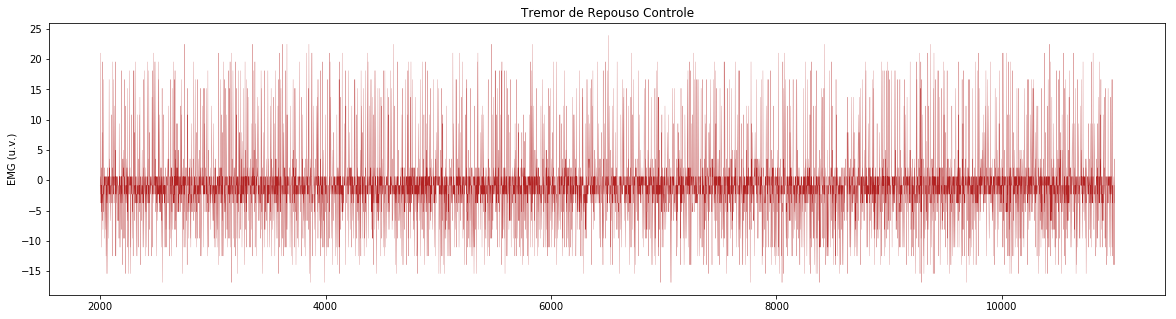

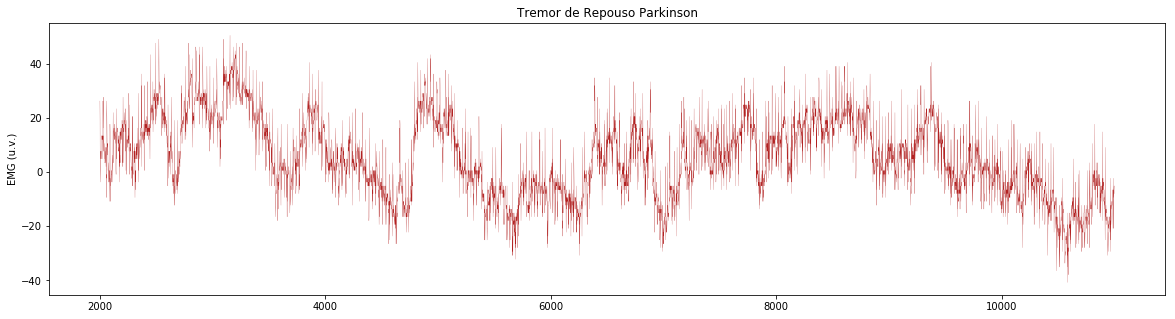

In [8]:
plotarIndividual(df_ct, 'ch1', 'Controle')
plotarIndividual(df_pk, 'ch1', 'Parkinson')

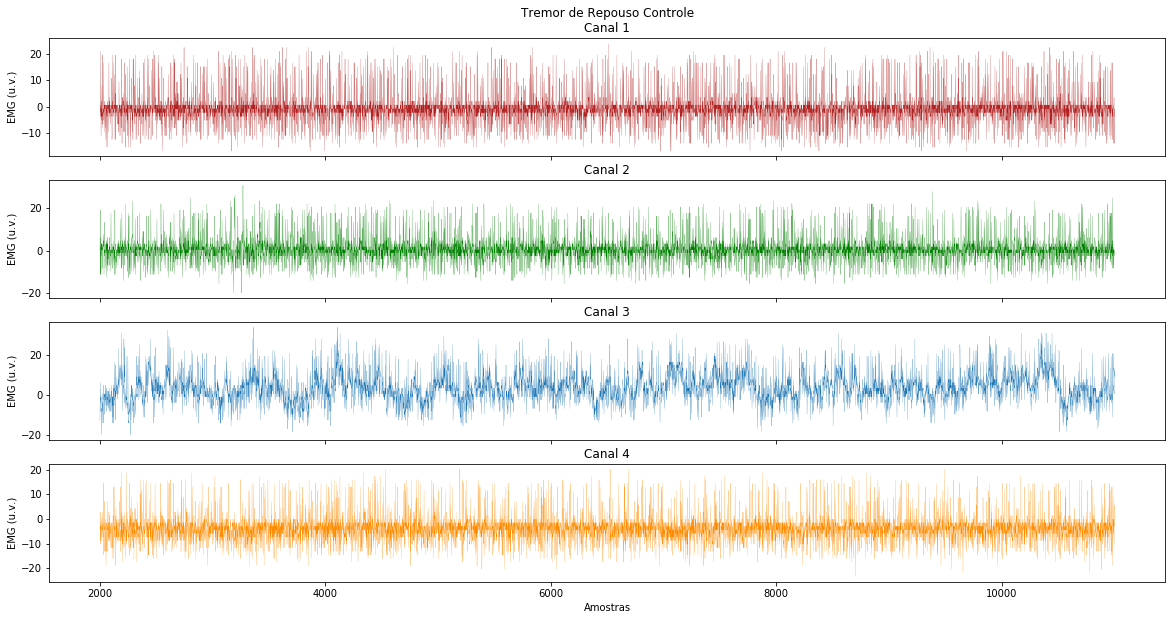

<Figure size 2880x1440 with 0 Axes>

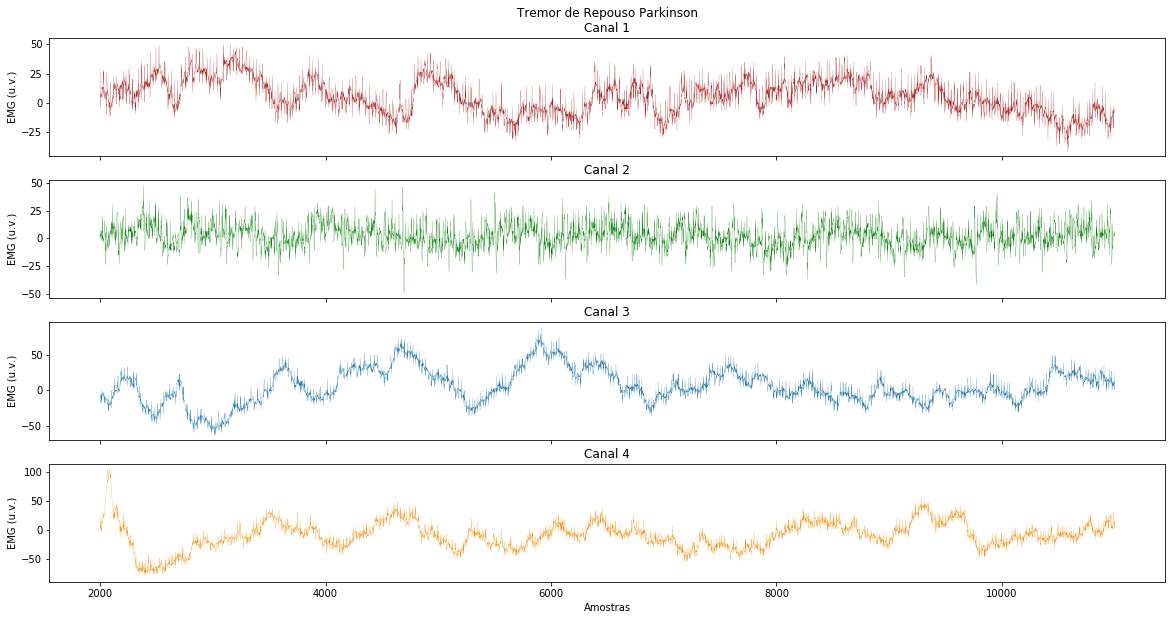

<Figure size 2880x1440 with 0 Axes>

In [9]:
plotar(df_ct, 'Controle')
plotar(df_pk, 'Parkinson')

# Aplicando FFT

In [10]:
def fft(df, canal):
    a = np.abs(np.fft.fft(df[canal][2000:11000]))
    f = np.linspace(0,2000,df[canal][2000:11000].shape[0])
    return (a,f)

def plotarFFT(a, b, titulo):
    plt.title(titulo)
    plt.plot(b,a)
    plt.xlim([0,500])
    plt.ylim([0,5000])
    plt.show

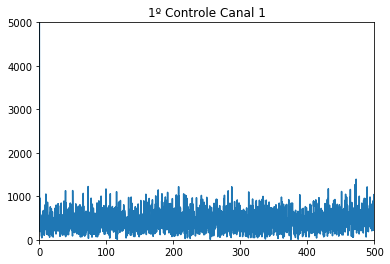

In [11]:
a, b = fft(df_ct, 'ch1')
plotarFFT(a,b, '1º Controle Canal 1')

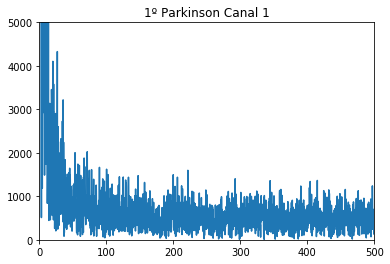

In [12]:
a, b = fft(df_pk, 'ch1')
plotarFFT(a,b, '1º Parkinson Canal 1')

In [13]:
df_ct2 = carregarDataFrame(dados_edf+controle+ct[1])
df_pk2 = carregarDataFrame(dados_edf+parkinson+pk[1])

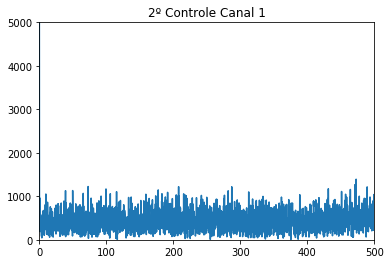

In [14]:
a, b = fft(df_ct2, 'ch1')
plotarFFT(a,b, '2º Controle Canal 1')

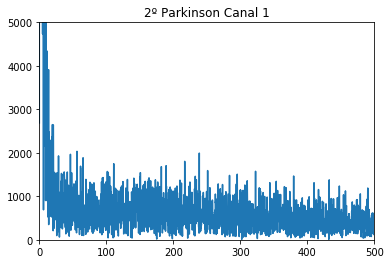

In [15]:
a, b = fft(df_pk2, 'ch1')
plotarFFT(a,b, '2º Parkinson Canal 1')

In [16]:
df_ct3 = carregarDataFrame(dados_edf+controle+ct[2])
df_pk3 = carregarDataFrame(dados_edf+parkinson+pk[2])

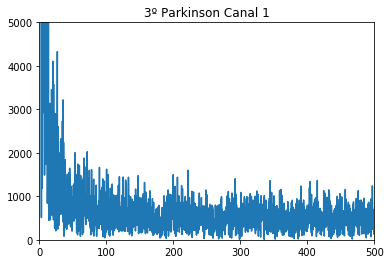

In [17]:
a, b = fft(df_pk3, 'ch1')
plotarFFT(a,b, '3º Parkinson Canal 1')

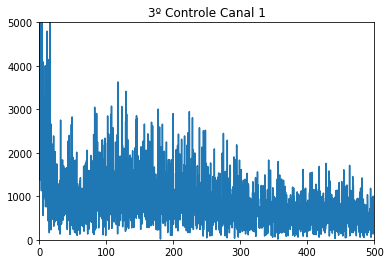

In [18]:
a, b = fft(df_ct3, 'ch1')
plotarFFT(a,b, '3º Controle Canal 1')